In [1]:
%load_ext wurlitzer

# Projecting multiple JunoCam images into a mosaic
This is an extension of projecting a single image. In this case, we want to project multiple individual images and stack them together to create a mosaic of the region. This is a follow-up from `projection.ipynb`. 

First, import the projector functions.

In [2]:
from projection import projector
from projection import globals
import numpy as np

As before, we need the SPICE kernels to do the projection. Therefore, make sure you have the latest kernels to do the projection. Go to the folder where you want the kernels to be saved and run,
```bash
wget -m -nH --cut-dirs=3 -nv ftp://naif.jpl.nasa.gov/pub/naif/JUNO/kernels/
```

This will create a `kernels/` folder and populate it with different kernels that define the *Juno* spacecraft and Jupiter. In the next cell, set `KERNEL_DATAFOLDER` to point to the `kernels` folder that was created. 

**WARNING: The downloaded data is in excess of 30 GBs. Make sure you have the disk space for it**

In [3]:
KERNEL_DATAFOLDER = '/home/local/Isis/data/juno/kernels/'

The method is the same as for a single image, where we initialize the `Projector` class. Now, we will do the initialization and processing for each image that is part of the mosaic. Download the image and metadata from the [the JunoCam Processing website](https://www.missionjuno.swri.edu/junocam/processing) and unzip them in this folder. You should now have several .json and .png files in the DataSet/ and ImageSet/ folders, respectively. Note the IDs in the metadata filename.

Note: Each image will take some time (5-10 mins), so you can go grab something to drink. Also, be sure to change the number of processors as needed.  

In the end, each image will have its own netCDF file that we can use later to do the projection. We will store the output names of the netCDF file to be used in the mosaicing pipeline later. 

In [4]:
files = []
for ids in [10344, 10345, 10347, 10348, 10349, 10350, 10351, \
            10352, 10354, 10384, 10385, 10387, 10388, 10389, 10390, 10392, 10393, 10394, 10395]:
    proj = projector.Projector("ImageSet/", "DataSet/%d-Metadata.json"%ids, KERNEL_DATAFOLDER)
#     proj.process(num_procs=14)
    files.append(proj.fname+".nc")

With all the individual images projected, we can combine them into a mosaic using the `map_project_multi` function. The input arguments are the list of netCDF files, the pixel resolution (in degrees/pixel) and the number of processors to use. The function will automatically determine the lat/lon extent of the mosaic and stack them together. When done, the mosaic data will be saved in a `multi_proj_raw.nc` file, which we can use to plot later. 

Note: this step takes a very long time, and uses a lot of memory especially for high resolution images. 

In [5]:
resolution=25 ## pixels/degree
datafile, IMG, mask = projector.map_project_multi(files, pixres=1./resolution, num_procs=14, extents=[-180, 180, -90, 90])

Extents - lon: -180.000 180.000  lat: -90.000 90.000
Mosaic shape: 9000 x 4500
Projecting JNCE_2021105_33C00028_V01
 4400/4500 
Processing B
 19/20
[=================== ] 95.00%
Processing G
 19/20
[=================== ] 95.00%
Processing R
 19/20
[=================== ] 95.00%
Projecting JNCE_2021105_33C00029_V01
 4400/4500 
Processing B
 19/20
[==================  ] 94.74%
Processing G
 19/20
[==================  ] 94.74%
Processing R
 19/20
[==================  ] 94.74%
Projecting JNCE_2021105_33C00031_V01
 4400/4500 
Processing B
 19/20
[==================  ] 92.86%
Processing G
 19/20
[==================  ] 92.86%
Processing R
 19/20
[==================  ] 93.33%
Projecting JNCE_2021105_33C00032_V01
 4400/4500 
Processing B
 19/20
[==================  ] 93.33%
Processing G
 19/20
[==================  ] 93.33%
Processing R
 19/20
[==================  ] 93.33%
Projecting JNCE_2021105_33C00033_V01
 4400/4500 
Processing B
 19/20
[==================  ] 93.33%
Processing G
 19/20
[=====

Finally, we do a basic color correction, normalization and gamma correction to the image. Input the latitude/longitude from before for setting the axis. 

You can save out the new image to a PNG file (with filename given by the `fname` argument) with `save=True`. The input file is the `multi_proj_raw.nc` from the previous step.

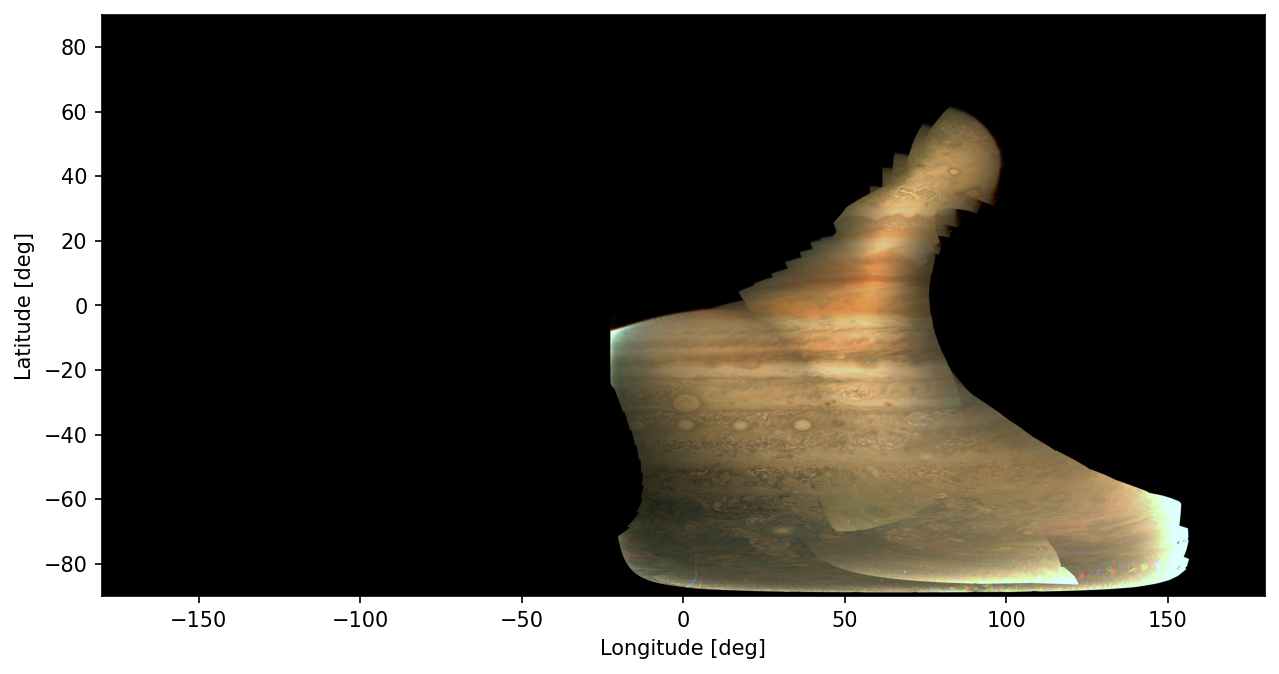

In [6]:
IMG_corr = projector.color_correction("multi_proj_raw.nc", gamma=1.5, fname="mosaic", save=True)

We can plot this in an orthogonal projection to simulate what the spacecraft saw. To do this, use the `plot_ortho` function whose input arguments are the `multi_proj_raw.nc` file and a scaling for the satellite height. A scaling of more than one will place the spacecraft further away from the planet (i.e. provide a larger field of view), while one that is less than one will be closer to the planet. 

/usr/local/lib/python3.6/dist-packages/Cartopy-0.17.1.dev168_-py3.6-linux-x86_64.egg/cartopy/mpl/geoaxes.py:434: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


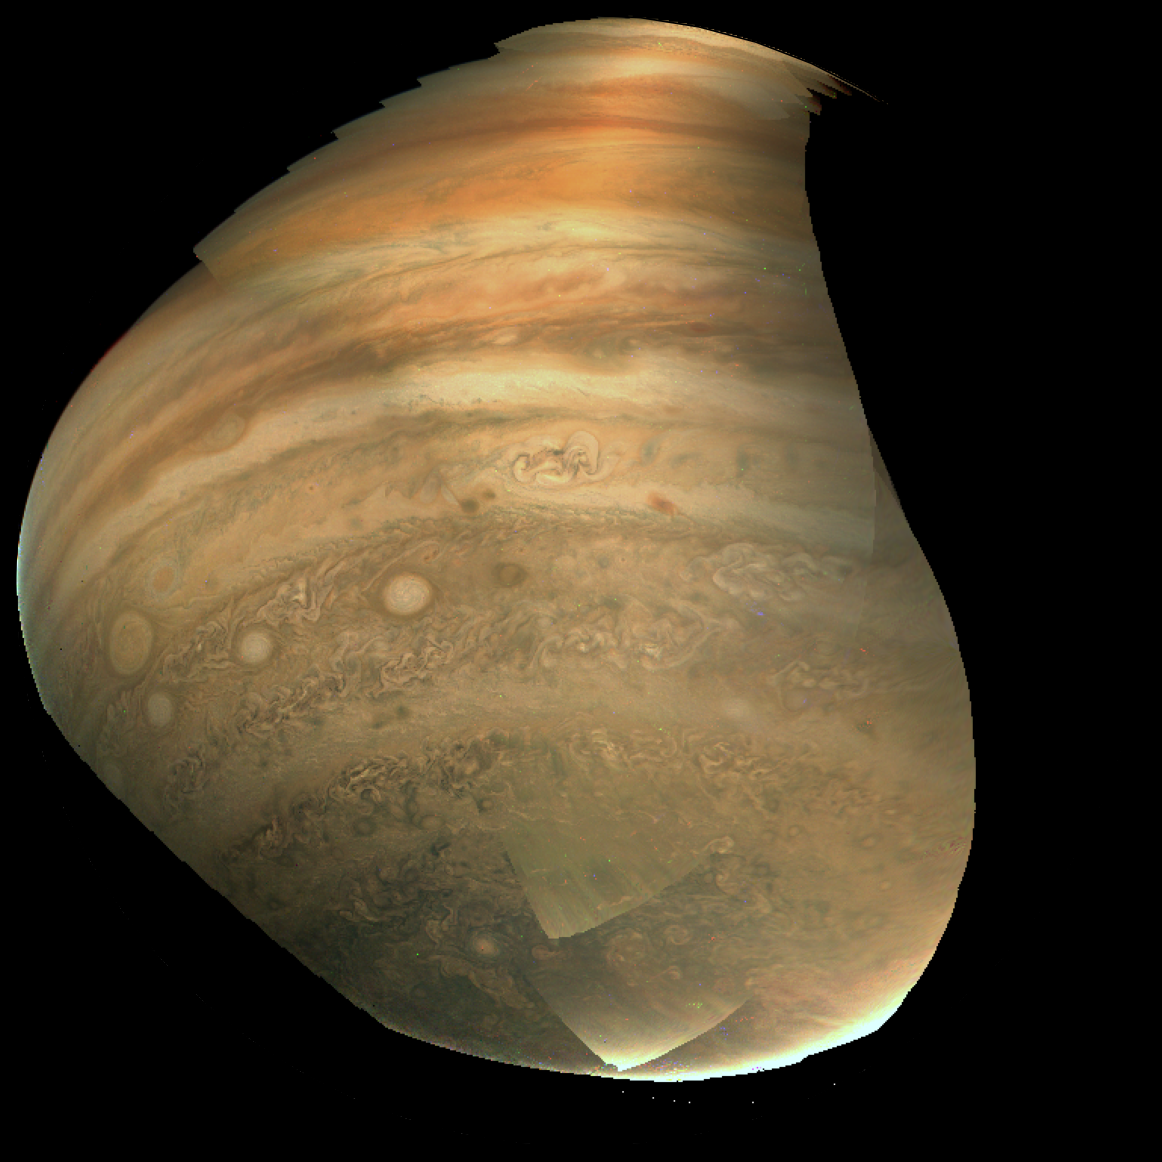

In [7]:
projector.plot_ortho('multi_proj_raw.nc', sat_height_scale=0.75)